In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import io

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Import the dataset
from google.colab import files
uploaded = files.upload()

Saving comments.csv to comments.csv


In [3]:
# input some text
texts = pd.read_csv(io.BytesIO(uploaded['comments.csv']))
texts["comments"] = texts["comments"].str.replace(r"\\", "") ## Depending on your dataset, you may need to change here accordingly. 
texts

<ipython-input-3-4116d4c2c644>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  texts["comments"] = texts["comments"].str.replace(r"\\", "") ## Depending on your dataset, you may need to change here accordingly.


,comments
0,Great Professor with great chemistry knowledge...
1,This class was a lot of funny. Didn't want to ...
2,By far the worst teacher I have ever had in my...
3,Very difficult to understand
4,This wasn't a bad class. He seems to know what...
...,...
4785,Very nice guy cares about his students and tea...
4786,I took his class in Spring 2009. Excellent tea...
4787,I had Bill for his first year at Acadia - he w...
4788,Hellish course but with Dr. Ritchie it morphed...


In [4]:
### Input your dataset here if you choose to user your own dataset




In [5]:
#define a lemmatizer class
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
    def __call__(self, doc):
      res = []
      for token in self.nlp(doc):
        if not token.is_punct and not token.like_num and len(token.lemma_) > 2: # not punctuation or numbers and length > 2
          res.append(token.lemma_) # lemmatize
      return res

In [6]:
# Test the lemmatizer on one sentence first

text = texts.loc[10,"comments"]
lt = LemmaTokenizer()
doc = lt(text)
doc

['very',
 'EASY',
 'but',
 'you',
 'need',
 'CLASS',
 'and',
 'LISTEN',
 'work',
 'the',
 'problems',
 'and',
 'make',
 'sure',
 'you',
 'UNDERSTAND',
 'and',
 'MOST',
 'IMPORTANTLY',
 'take',
 'GREAT',
 'note',
 'open',
 'BOOK',
 'OPEN',
 'NOTE',
 'test',
 'take',
 'HIM',
 'again']

In [7]:
# Remove stopwords, and convert the texts into a word count matrix
from sklearn.feature_extraction.text import CountVectorizer
ngram_range = (1,1) # unigram only
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",   # You can pass in your own stopword list
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df1

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos",'cuz,'ve,(hint,(some,-5pg,-especially,-not,-sr,-veronica,...,zelazo,zheng,zipper,zirino,ziv,zombie,zone,zoology,zunz,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# get word frequency list
word_frequency = count_vect_df1.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,class,4219
1,good,1247
2,teacher,1186
3,professor,1155
4,easy,1152
...,...,...
6843,helful,1
6844,heilman,1
6845,heiland,1
6846,heck,1


<ipython-input-9-f17b6b08297f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


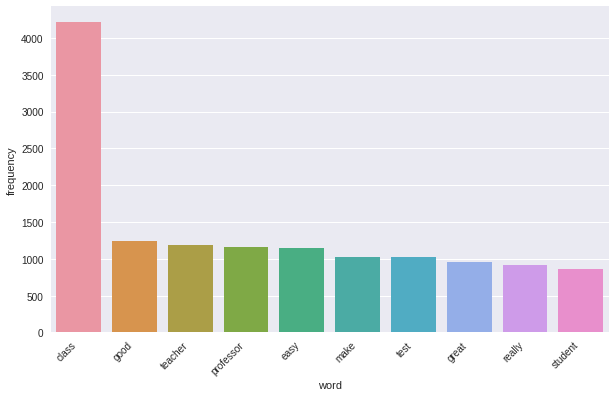

In [9]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(10)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

<ipython-input-10-f3ab17939b80>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


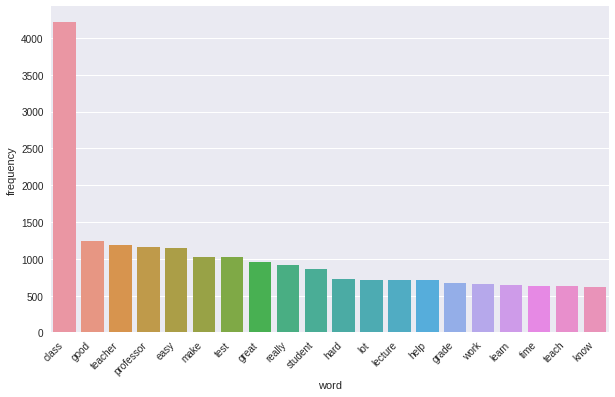

In [10]:
# Question 1: Please  create a bar chart to show the frequency for top 20 words. 
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data = word_frequency.head(20)
g = sns.barplot(data=data,
                x="word",
                y="frequency",
                ax=ax)
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()





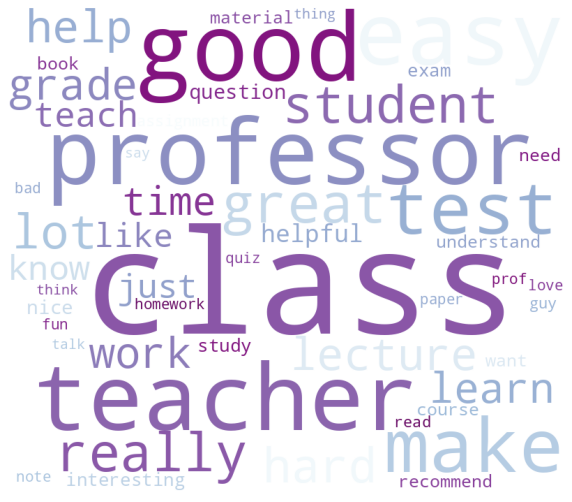

In [11]:
# plot the word cloud
from wordcloud import WordCloud
freq = word_frequency.set_index("word").to_dict()['frequency'] # convert pandas dataframe to dictionary

fig, ax = plt.subplots(1, 1, figsize = (10,10))
wc = WordCloud(background_color="white",
                prefer_horizontal = 1,
                width=800,
                height=700,
                max_words=50,
                relative_scaling=0.5,
                #font_path = "arial.ttf", # pass your own font path
                colormap = "BuPu", #matplotlib colormap
                random_state= 2022)
wc.generate_from_frequencies(freq)
ax.imshow(wc)
ax.axis("off")
plt.show()

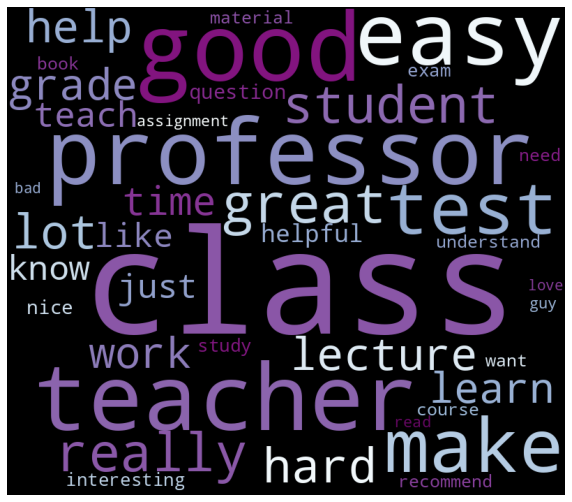

In [12]:
#Question 2: Please create a word cloud out of the text data. Change the background and text color to colors of your choice. Limit the number of words to be no more than 40.

from wordcloud import WordCloud
freq = word_frequency.set_index("word").to_dict()['frequency'] # convert pandas dataframe to dictionary

fig, ax = plt.subplots(1, 1, figsize = (10,10))
wc = WordCloud(background_color="black",
                prefer_horizontal = 1,
                width=800,
                height=700,
                max_words=40,
                relative_scaling=0.5,
                #font_path = "arial.ttf", # pass your own font path
                colormap = "BuPu", #matplotlib colormap
                random_state= 2022)
wc.generate_from_frequencies(freq)
ax.imshow(wc)
ax.axis("off")
plt.show()



In [13]:
# This calcualtes bigram matrix
ngram_range = (2,2)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df2

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos help",'cuz 've,'ve a&p,'ve academic,'ve accounting,'ve actually,'ve answer,'ve apa,'ve asu,'ve atm,...,zheng tell,zipper backpack,zirino great,ziv amazing,ziv really,zombie apocalypse,zone meet,zoology seminar,zunz really,zzzzzzzzz year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# get the phrase frequency list
word_frequency = count_vect_df2.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,great teacher,227
1,good teacher,217
2,good professor,178
3,make sure,169
4,easy class,152
...,...,...
44088,guidance disappoint,1
44089,guidance professor,1
44090,guide actual,1
44091,guide angel,1


<ipython-input-15-cf76cd21b2fa>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


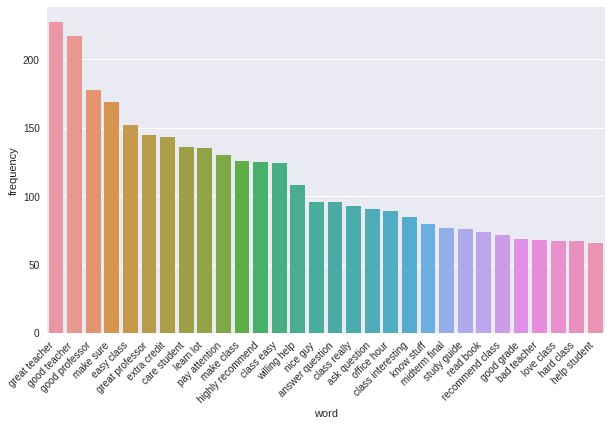

In [15]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(30)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

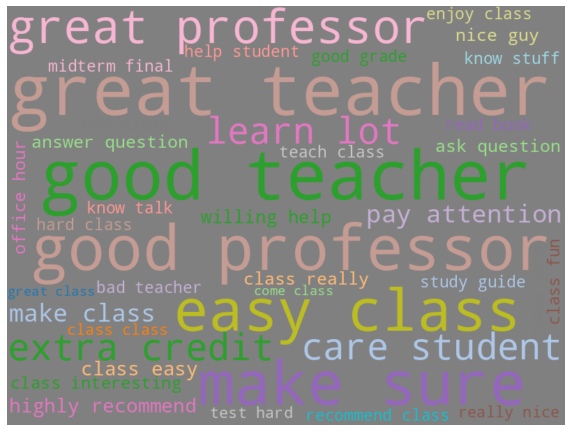

In [16]:
# Question 3: Please create a word cloud based on the bi-gram, i.e., 2-word phrase cloud

bigram_counts = count_vect_df2.sum().sort_values(ascending=False)[:40].to_dict()

wordcloud = WordCloud(background_color="gray",
                      width=800,
                      height=600,
                      max_words=40,
                      colormap="tab20",
                      random_state=42)

wordcloud.generate_from_frequencies(bigram_counts)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





In [17]:
# This creates the trigram matrix
ngram_range = (3,3)
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=LemmaTokenizer(),
                             stop_words = "english",
                             ngram_range = ngram_range
                             )
X = vectorizer.fit_transform(texts["comments"])
count_vect_df3 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df3

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,"""videos help explain",'cuz 've pseudo,'ve a&p explanation,'ve academic career,'ve accounting hard,'ve actually insightful,'ve answer question,'ve apa style,'ve asu great,'ve atm boring,...,zheng tell lot,zipper backpack miss,zirino great guy,ziv amazing personality,ziv really convey,zombie apocalypse class,zone meet new,zoology seminar week,zunz really enthusiastic,zzzzzzzzz year psych
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-18-cf76cd21b2fa>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


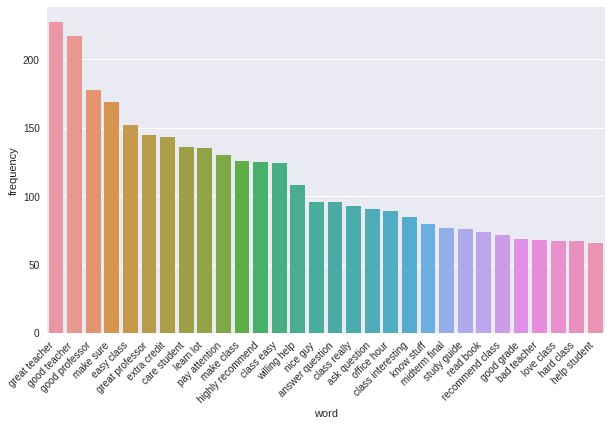

In [18]:
# plot bar chart
plt.style.use("seaborn")
fig, ax = plt.subplots(1, 1, figsize = (10,6))
data = word_frequency.head(30)
g=sns.barplot(data=data,
              x="word",
              y="frequency",
              ax=ax
            )
ax.set_xticklabels(data["word"], ha='right', rotation=45)
plt.show()

In [19]:
# get the phrase frequency list
word_frequency = count_vect_df3.sum(axis=0).sort_values(ascending=False).reset_index()
word_frequency.columns = ["word", "frequency"]
word_frequency

,word,frequency
0,really care student,35
1,make sure understand,30
2,make class interesting,30
3,pay attention class,24
4,good professor 've,24
...,...,...
64203,good professor lay,1
64204,good professor learn,1
64205,good professor library,1
64206,good professor mdc,1
